In [41]:
setwd("/home/pasoneto/Documents/github/doc_suomi/code")
source("utils.R")
setwd("/home/pasoneto/Documents/pessoal")
dt = fread("betin.csv")

In [62]:
m = dt %>% 
       dplyr::select(valence, energy, loudness, tempo, artist_name) %>%
       mutate(valence = z(valence), energy = z(energy), loudness = z(loudness), tempo = z(tempo)) %>%
       group_by(artist_name) %>%
       summarize(valence = mean(valence), energy = mean(energy),
                 loudness = mean(loudness), tempo = mean(tempo)) %>%
       melt(measure.vars = c("valence", "energy", "loudness", "tempo"))

sd = dt %>% group_by(artist_name) %>%
       dplyr::select(valence, energy, loudness, tempo, artist_name) %>%
       mutate(valence = z(valence), energy = z(energy), loudness = z(loudness), tempo = z(tempo)) %>%
       summarize(valence = sd(valence)/sqrt(length(valence)), energy = sd(energy)/sqrt(length(energy)),
                 loudness = sd(loudness)/sqrt(length(loudness)), tempo = sd(tempo)/sqrt(length(tempo))) %>%
       melt(measure.vars = c("valence", "energy", "loudness", "tempo")) %>%
       dplyr::select(value)
m$sd = sd

`summarise()` ungrouping output (override with `.groups` argument)

Warning message in melt(., measure.vars = c("valence", "energy", "loudness", "tempo")):
“The melt generic in data.table has been passed a tbl_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
`summarise()` ungrouping output (override with `.groups` argument)

Warning message in melt(., measure.vars = c("valence", "energy", "loudness", "tempo")):
“The melt generic in data.table has been passed a tbl_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries

In [63]:
f = dplyr::bind_cols(c(m, sd))
colnames(f) = c("Artista", "Feature", "Media", "DesvPad")

New names:
* value -> value...3
* value -> value...4
* value -> value...5



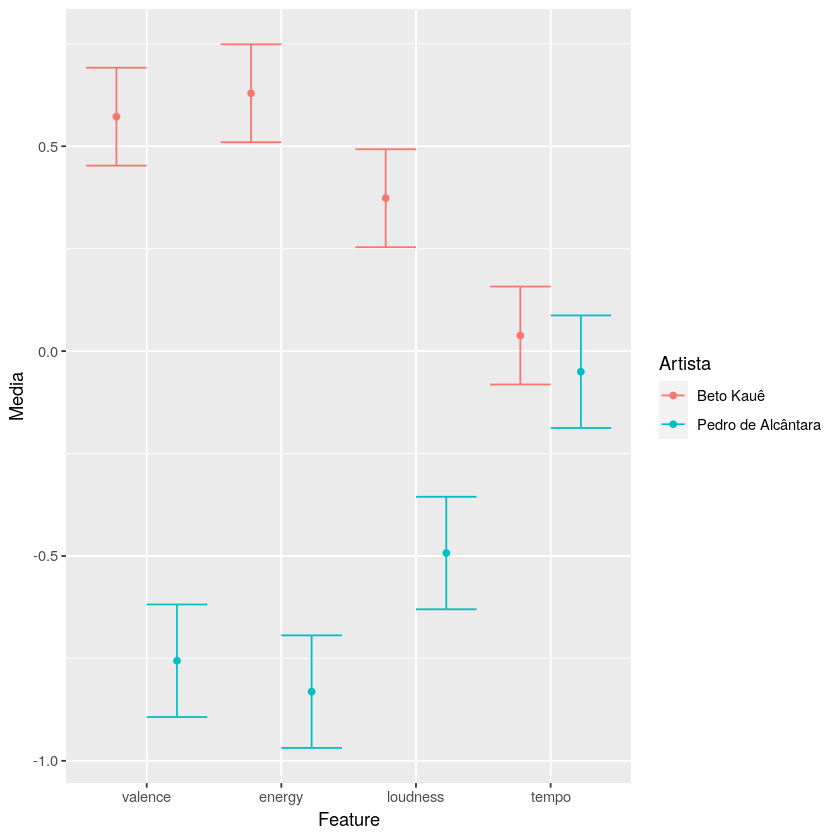

In [64]:
f %>% ggplot(aes(x = Feature, y = Media, color = Artista))+
           geom_point(position = position_dodge(width = 0.9)) + 
           geom_errorbar(aes(ymax=Media+DesvPad, ymin=Media-DesvPad), position = position_dodge(width = 0.9))